In [8]:
import keras
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.datasets import mnist
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1) # not to 2d so that we can do conv
x_train=x_train.astype('float')
x_train/=255
x_test=x_test.reshape(10000,28,28,1)
x_test=x_test.astype('float')
x_test/=255
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

In [10]:
cnn=keras.models.Sequential()
cnn.add(Conv2D(32,kernel_size=(5,5),input_shape=(28,28,1),name='Conv1',padding='same',activation='relu'))  # 32 is number of filters
cnn.add(MaxPool2D(name='MP1'))
cnn.add(Conv2D(64,kernel_size=(5,5),name='Conv2',padding='same',activation='relu'))
cnn.add(MaxPool2D(name='MP2'))
cnn.add(Flatten(name='Flt',))
cnn.add(Dense(1024,name='HL1',activation='relu'))
cnn.add(Dense(10,name='OL',activation='softmax'))
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 28, 28, 32)        832       
                                                                 
 MP1 (MaxPooling2D)          (None, 14, 14, 32)        0         
                                                                 
 Conv2 (Conv2D)              (None, 14, 14, 64)        51264     
                                                                 
 MP2 (MaxPooling2D)          (None, 7, 7, 64)          0         
                                                                 
 Flt (Flatten)               (None, 3136)              0         
                                                                 
 HL1 (Dense)                 (None, 1024)              3212288   
                                                                 
 OL (Dense)                  (None, 10)               

Epoch 1/10
750/750 [==============================] - 56s 74ms/step - loss: 0.1274 - accuracy: 0.9599 - val_loss: 0.0438 - val_accuracy: 0.9868
Epoch 2/10
750/750 [==============================] - 57s 76ms/step - loss: 0.0395 - accuracy: 0.9874 - val_loss: 0.0498 - val_accuracy: 0.9858
Epoch 3/10
750/750 [==============================] - 66s 87ms/step - loss: 0.0252 - accuracy: 0.9923 - val_loss: 0.0407 - val_accuracy: 0.9890
Epoch 4/10
750/750 [==============================] - 68s 91ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0428 - val_accuracy: 0.9887
Epoch 5/10
750/750 [==============================] - 59s 79ms/step - loss: 0.0130 - accuracy: 0.9956 - val_loss: 0.0462 - val_accuracy: 0.9877
Epoch 6/10
750/750 [==============================] - 66s 87ms/step - loss: 0.0123 - accuracy: 0.9962 - val_loss: 0.0359 - val_accuracy: 0.9913
Epoch 7/10
750/750 [==============================] - 58s 78ms/step - loss: 0.0101 - accuracy: 0.9966 - val_loss: 0.0382 - val_accuracy:

<Axes: >

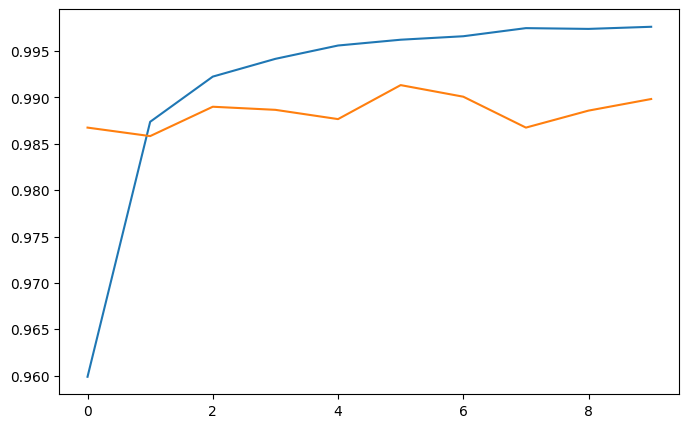

In [11]:
# cnn.load_weights('weights/cnn-model5.h5')
history=cnn.fit(x_train,y_train,verbose=1,batch_size=64,epochs=10,validation_split=0.2)
pd.DataFrame(history.history)['accuracy'].plot(figsize=(8,5))
pd.DataFrame(history.history)['val_accuracy'].plot(figsize=(8,5))

In [12]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.0388 - accuracy: 0.9901


[0.03877054527401924, 0.9901000261306763]

In [13]:
cnn.save("mnist-conv")

INFO:tensorflow:Assets written to: mnist-conv\assets


INFO:tensorflow:Assets written to: mnist-conv\assets
